# Plotting Notebook for timebinned diffraction
## First loading in modules

In [6]:
import sys
#sys.path.insert(0, '/cds/home/s/sbm7/CXI_QD/')
import matplotlib.pyplot as plt
import numpy as np
#from psana import *
print('done')
%matplotlib inline

done


# Loading in pre-processed data and masking

## Use this box to load and analyze a single file

In [7]:
experiment = 'cxilx8720'

f1 = 'QD_ps_run187to192_scaled.npz'
#This unpacks everything from the small data file produced in the processor script
hf1 = np.load(f1)
for item in hf1:
	print(item)
	exec('%s = np.array(hf1[item])' %str(item))
    

print('task complete')


errors
ibpdiffs
raons
q_bins
error_rapdiffs
error_aapdiffs
aapdiffs
time_bins
phi_bins
raoffs
rapdiffs
task complete


In [8]:
print(errors.shape)
print(ibpdiffs.shape)
print(q_bins.shape)
print(error_rapdiffs.shape)
print(error_aapdiffs.shape)
print(aapdiffs.shape)
print(time_bins.shape)
print(phi_bins.shape)
print(rapdiffs.shape)

(30, 50, 15)
(30, 50, 15)
(50,)
(50, 15)
(30, 15)
(30, 15)
(15,)
(30,)
(50, 15)


## Scales or baseline correction parameters

## Apply moving average

In [9]:
import pandas as pd

sz = np.shape(raons) # sz[0] - size of qbins , sz[1] - size of tbins

rapdiffs_movmean = np.zeros((sz[0],sz[1]))

for i in range(0,sz[1]):
     rapdiffs_movmean[:,i] = pd.Series(rapdiffs[:,i]).rolling(window=3,axis=0).mean()

C:\Users\laure\AppData\Local\Temp\ipykernel_17672\3985063708.py:8: FutureWarning: The 'axis' keyword in Series.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  rapdiffs_movmean[:,i] = pd.Series(rapdiffs[:,i]).rolling(window=3,axis=0).mean()


## Make 1 D LineOuts with baseline corrections applied 

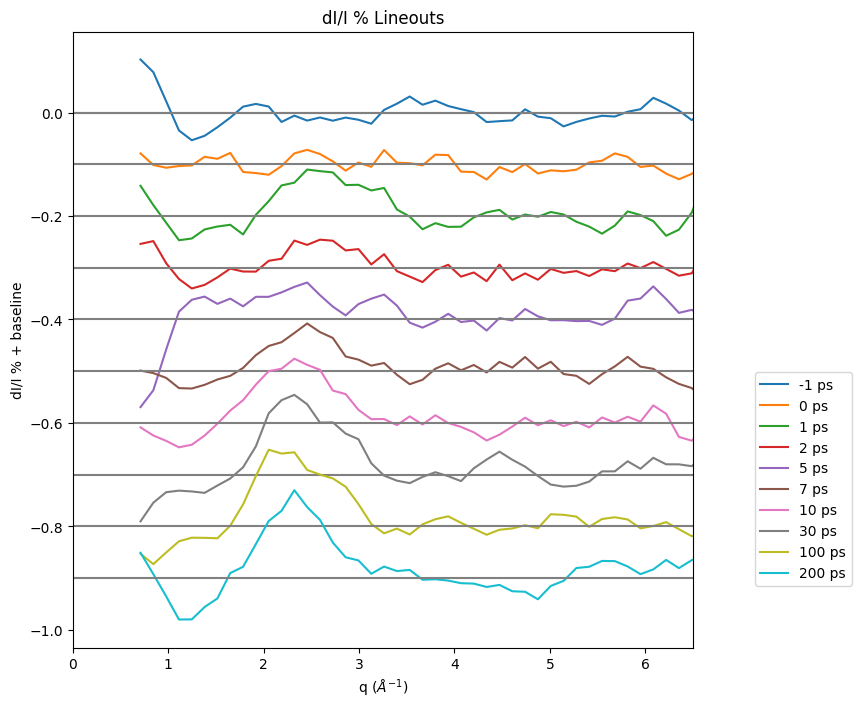

In [11]:
from scipy.ndimage import gaussian_filter as gf
plt.figure(figsize=(8,8))
#for i in range(0, rapdiffs[0,:].size):
b = 0
j = 0   
#for i in range(1,2):
for i in [0,1,2,3,6,8,11,12,13,14]:
    j +=  1
    #plt.errorbar(q_bins,(rapdiffs_movmean[:,i]) + b, yerr = error_rapdiffs[:,i], label = '%0.0f ps' % time_bins[i]) 
    plt.plot(q_bins,(rapdiffs_movmean[:,i]) + b, label = '%0.0f ps' % time_bins[i])
    plt.axhline(y=b,color='grey')
    b += -0.1
plt.xlabel('q ($\AA^{-1}$)')
plt.ylabel('dI/I % + baseline')
plt.title('dI/I % Lineouts')
plt.xlim([0,6.5])
#plt.ylim([-0.05,0.05])
plt.axhline(y=0, color='grey')
#plt.legend(loc='best')
plt.legend(loc=(1.1,0.1))
plt.show()
#plt.savefig('CHD_radial_average.png')

# Make a dI/I %change(q) vs time plot
## Radial

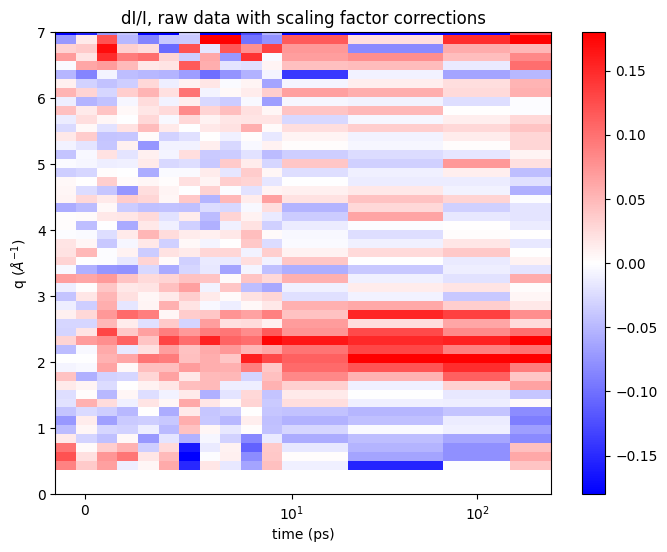

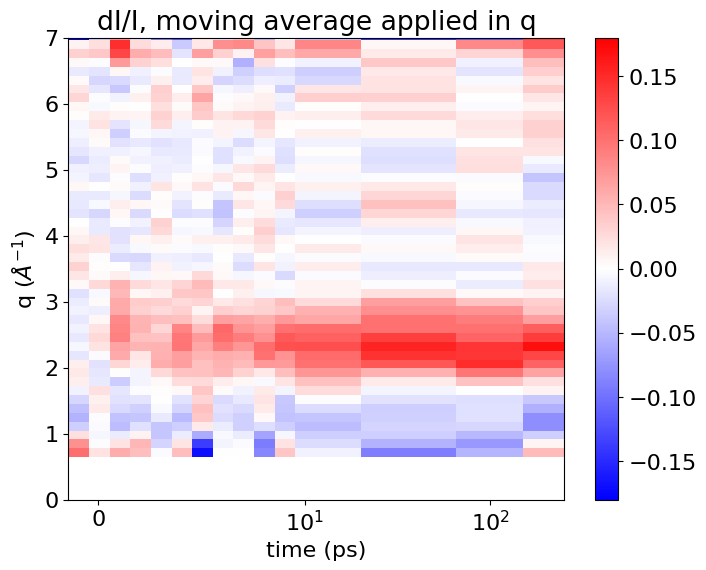

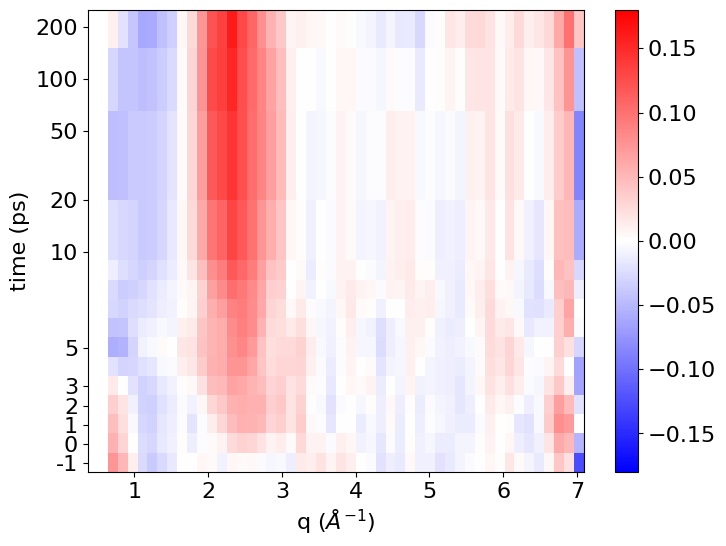

In [12]:
from scipy.ndimage import gaussian_filter as gf


plt.figure(figsize=(8,6))
plt.ylabel('q ($\AA^{-1}$)')
plt.xlabel('time (ps)')
plt.title('dI/I, raw data with scaling factor corrections')
plt.pcolormesh(time_bins,q_bins,rapdiffs,cmap = 'bwr')
plt.clim(-0.18, 0.18)
#plt.xlim([-2, 20])
plt.xscale('symlog', linthresh=10)
plt.ylim([0,7])
#plt.ylim([-1.5, 200])
plt.colorbar()
plt.show()

plt.rcParams['font.size'] = '16'
plt.figure(figsize=(8,6))
plt.ylabel('q ($\AA^{-1}$)')
plt.xlabel('time (ps)')
plt.title('dI/I, moving average applied in q')
plt.pcolormesh(time_bins,q_bins,(rapdiffs_movmean), cmap = 'bwr')
plt.clim(-0.18, 0.18)
#plt.xlim([-2, 20])
plt.xscale('symlog', linthresh=10)
plt.ylim([0,7])
plt.colorbar()
plt.show()


plt.figure(figsize=(8,6))
plt.xlabel('q ($\AA^{-1}$)')
plt.ylabel('time (ps)')
#plt.title('dI/I: QC, moving average applied in q and Gaussian filter in time')
plt.pcolormesh(q_bins,time_bins,(gf(rapdiffs_movmean,(0,1))).T, cmap = 'bwr')
#plt.pcolormesh( q_bins,time_bins, np.transpose( gf(rapdiffs_movmean,(0,1))), cmap = 'bwr')
plt.clim(-0.18, 0.18)
# plt.xlim([-2, 20])
plt.yscale('symlog', linthresh=10)
custom_ticks = [-1, 0, 1, 2, 3, 5, 10, 20, 50, 100, 200]  # Add ticks between 0 and 10
plt.yticks(custom_ticks, labels=custom_ticks)
#plt.ylim([0,7])
#plt.yticks([0,25,50,75,100,125,150])
#plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.colorbar()
plt.show()
#plt.savefig('QD_ps.png')

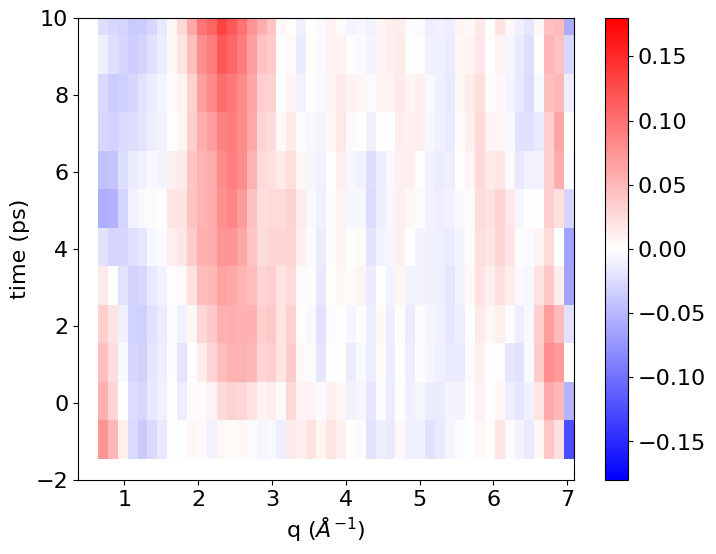

In [13]:
plt.figure(figsize=(8,6))
plt.xlabel('q ($\AA^{-1}$)')
plt.ylabel('time (ps)')
#plt.title('dI/I: QC, moving average applied in q and Gaussian filter in time')
plt.pcolormesh(q_bins,time_bins,(gf(rapdiffs_movmean,(0,1))).T, cmap = 'bwr')
#plt.pcolormesh( q_bins,time_bins, np.transpose( gf(rapdiffs_movmean,(0,1))), cmap = 'bwr')
plt.clim(-0.18, 0.18)
# plt.xlim([-2, 20])
plt.ylim(-2,10)
#plt.yticks([0,25,50,75,100,125,150])
#plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.colorbar()
plt.show()


